<h2>Uber Data Analysis With Python</h2>

<h5>Uber Technologies, Inc., commonly known as Uber, is an American technology company. Its services include ride-hailing, food delivery, package delivery, couriers, freight transportation, and, through a partnership with Lime, electric bicycle and motorized scooter rental.</h5>




<li>We will use python to find.</li>
<li>Check how long do people travel with Uber?</li>
<li>What Hour Do Most People Take Uber To Their Destination?</li>
<li>Check The Purpose Of Trips</li>
<li>Which Day Has The Highest Number Of Trips</li>
<li>What Are The Number Of Trips Per Each Day?</li>
<li>What Are The Trips In The Month.</li>
<li>The starting points of trips. Where Do People Start Boarding Their Trip From Most?</li>

<h3>Importing Libraries</h3>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import calendar

<h3>Importing Dataset</h3>

In [2]:
df = pd.read_csv("Uber Drives - .csv")

<h3>Size of the Dataset</h3>

In [3]:
df.shape

(1156, 7)

<h3>Checking first 5 rows</h3>

In [4]:
df.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


<h3>Changes the column names</h3>

In [5]:
columns = ['Start_Date','End_Date','Category','Start','Stop','Miles','Purpose']

In [6]:
df.columns = columns

In [7]:
df.head()

,Start_Date,End_Date,Category,Start,Stop,Miles,Purpose
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


<h3>Checking Dtypes</h3>

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Start_Date  1156 non-null   object 
 1   End_Date    1155 non-null   object 
 2   Category    1155 non-null   object 
 3   Start       1155 non-null   object 
 4   Stop        1155 non-null   object 
 5   Miles       1156 non-null   float64
 6   Purpose     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


<h3>Checking null values</h3>

In [9]:
df.isnull().sum()

Start_Date      0
End_Date        1
Category        1
Start           1
Stop            1
Miles           0
Purpose       503
dtype: int64

In [10]:
df['Purpose'].value_counts()

Meeting            187
Meal/Entertain     160
Errand/Supplies    128
Customer Visit     101
Temporary Site      50
Between Offices     18
Moving               4
Airport/Travel       3
Charity ($)          1
Commute              1
Name: Purpose, dtype: int64

In [11]:
df = df.dropna()

In [12]:
df.isnull().sum()

Start_Date    0
End_Date      0
Category      0
Start         0
Stop          0
Miles         0
Purpose       0
dtype: int64

In [13]:
df.shape

(653, 7)

<h3>Converting data types</h3>

In [14]:
df['Start_Date'] =  pd.to_datetime(df['Start_Date'],format = '%m/%d/%Y %H:%M')
df['End_Date'] =  pd.to_datetime(df['End_Date'],format = '%m/%d/%Y %H:%M')

In [15]:
df.head()

,Start_Date,End_Date,Category,Start,Stop,Miles,Purpose
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
5,2016-01-06 17:15:00,2016-01-06 17:19:00,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain


In [16]:
df.dtypes

Start_Date    datetime64[ns]
End_Date      datetime64[ns]
Category              object
Start                 object
Stop                  object
Miles                float64
Purpose               object
dtype: object

<h3>Adding new columns</h3>

In [17]:
df['Hour'] = df['Start_Date'].apply(lambda time:time.hour)
df['Day'] = df['Start_Date'].apply(lambda time:time.day)
df['Month'] = df['Start_Date'].apply(lambda time:time.month)
df['Day_of_week'] = df['Start_Date'].apply(lambda time:time.dayofweek)


In [18]:
df.head()

,Start_Date,End_Date,Category,Start,Stop,Miles,Purpose,Hour,Day,Month,Day_of_week
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,21,1,1,4
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,20,2,1,5
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,17,5,1,1
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,14,6,1,2
5,2016-01-06 17:15:00,2016-01-06 17:19:00,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain,17,6,1,2


In [19]:
df['weekday'] = df['Start_Date'].dt.day_name()

In [20]:
df.head()

,Start_Date,End_Date,Category,Start,Stop,Miles,Purpose,Hour,Day,Month,Day_of_week,weekday
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,21,1,1,4,Friday
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,20,2,1,5,Saturday
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,17,5,1,1,Tuesday
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,14,6,1,2,Wednesday
5,2016-01-06 17:15:00,2016-01-06 17:19:00,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain,17,6,1,2,Wednesday


<h3>Checking Categories</h3>

In [21]:
df['Category'].unique()

array(['Business', 'Personal'], dtype=object)

In [22]:
df['Category'].value_counts()

Business    647
Personal      6
Name: Category, dtype: int64

In [23]:
df_category = df['Category'].value_counts().reset_index()
df_category.head()

,index,Category
0,Business,647
1,Personal,6


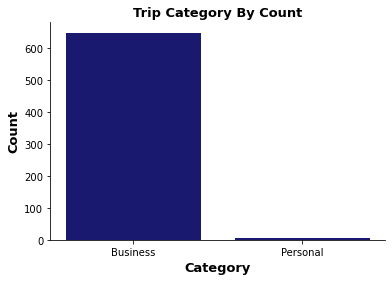

In [24]:
#creating bar graph
plt.figure(figsize=(6,4))
plt.bar(x=df_category['index'],height=df_category['Category'],color='midnightblue')
plt.title("Trip Category By Count",fontsize=13,weight="bold")
plt.xlabel("Category",fontsize=13,weight="bold")
plt.ylabel("Count",fontsize=13,weight="bold")
sns.despine()
plt.show()

<h6>We have large number of business ride and very less perosnal ride</h6>

<h3>How long do people travel with Uber</h3>

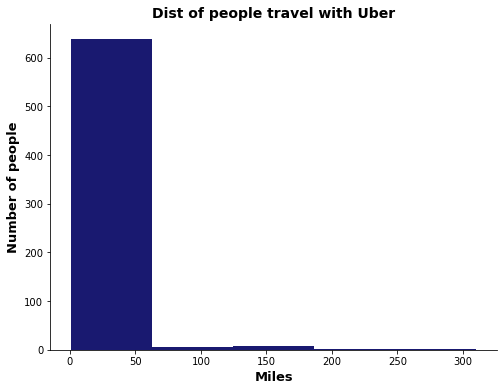

In [25]:
#Creating Histogram
plt.figure(figsize=(8,6))
plt.hist(df['Miles'],bins=5,color='midnightblue')
plt.title('Dist of people travel with Uber',fontsize=14,weight='bold')
plt.xlabel('Miles',fontsize=13,weight='bold')
plt.ylabel('Number of people',fontsize=13,weight='bold')
sns.despine()
plt.show()

<h6>Mostly people travel in a short mile with uber</h6>

<h3>What Hour Do Most People Take Uber To Their Destination</h3>

In [26]:
df_hour = df['Hour'].value_counts().reset_index()

In [27]:
df_hour.head()

,index,Hour
0,13,55
1,14,52
2,17,51
3,15,51
4,18,51


In [28]:
column = ['Hour','Count']
df_hour.columns = column

In [29]:
df_hour.head()

,Hour,Count
0,13,55
1,14,52
2,17,51
3,15,51
4,18,51


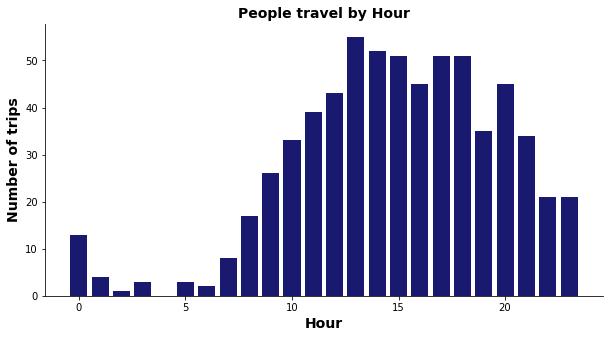

In [30]:
plt.figure(figsize=(10,5))
plt.bar(x=df_hour['Hour'],height=df_hour['Count'],color='midnightblue')
plt.title('People travel by Hour',fontsize=14,weight='bold')
plt.xlabel('Hour',fontsize=14,weight='bold')
plt.ylabel('Number of trips',fontsize=14,weight='bold')
sns.despine()
plt.show()

<h6> As we can see 4am does not have any rides and the 1pm has highest ride and 2am has least rides</h6>

<h3>Check purpose of the trip</h3>

In [31]:
df['Purpose'].unique()

array(['Meal/Entertain', 'Errand/Supplies', 'Meeting', 'Customer Visit',
       'Temporary Site', 'Between Offices', 'Charity ($)', 'Commute',
       'Moving', 'Airport/Travel'], dtype=object)

In [32]:
df_Purpose = df['Purpose'].value_counts().reset_index()

In [33]:
df_Purpose.head()

,index,Purpose
0,Meeting,187
1,Meal/Entertain,160
2,Errand/Supplies,128
3,Customer Visit,101
4,Temporary Site,50


In [34]:
df_Purpose.sort_values(by='Purpose',ascending=False,inplace=True)

In [35]:
df_Purpose.head()

,index,Purpose
0,Meeting,187
1,Meal/Entertain,160
2,Errand/Supplies,128
3,Customer Visit,101
4,Temporary Site,50


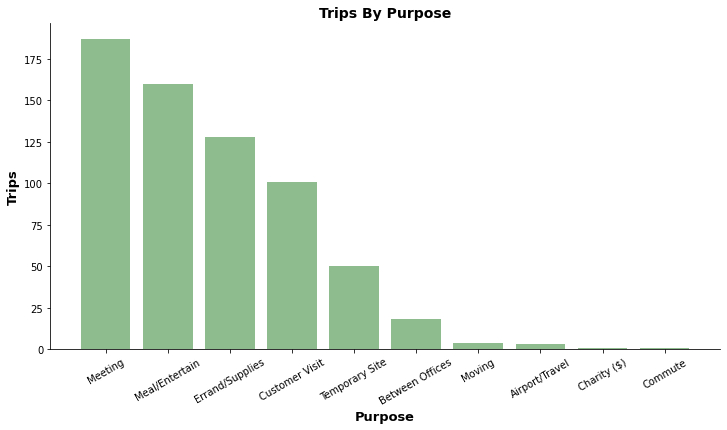

In [36]:
plt.figure(figsize=(12,6))
plt.bar(x=df_Purpose['index'],height=df_Purpose['Purpose'],color='darkseagreen')
plt.title('Trips By Purpose',fontsize=14,weight='bold')
plt.xlabel('Purpose',fontsize=13,weight='bold')
plt.xticks(rotation=30)
plt.ylabel('Trips',fontsize=13,weight='bold')
sns.despine()
plt.show()

<h6> we can notice that mostly the purpose of trips is meeting and meal/entertain</h6>

<h3>Which Day Has The Highest Number Of Trips</h3>

In [37]:
df_day = df['weekday'].value_counts().reset_index()

In [38]:
df_day.head()

,index,weekday
0,Friday,125
1,Tuesday,94
2,Thursday,92
3,Sunday,87
4,Monday,87


In [39]:
df_day.sort_values(by='weekday',ascending=False,inplace=True)

In [40]:
df_day.head()

,index,weekday
0,Friday,125
1,Tuesday,94
2,Thursday,92
3,Sunday,87
4,Monday,87


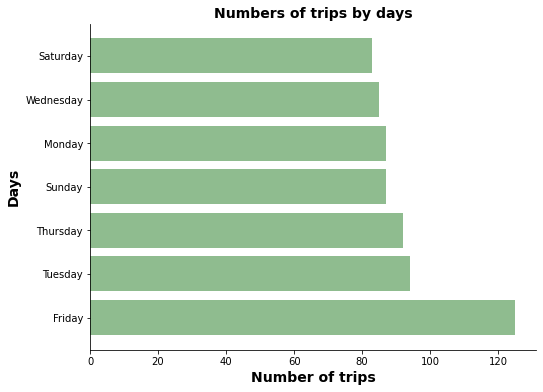

In [41]:
plt.figure(figsize=(8,6))
plt.barh(y=df_day['index'],width=df_day['weekday'],color='darkseagreen')
plt.title('Numbers of trips by days',fontsize=14,weight='bold')
plt.ylabel('Days',fontsize=14,weight='bold')
plt.xlabel('Number of trips',fontsize=14,weight='bold')
sns.despine()
plt.show()

<h6>Friday has highest numbers of the trip</h6>

In [42]:
df.head()

,Start_Date,End_Date,Category,Start,Stop,Miles,Purpose,Hour,Day,Month,Day_of_week,weekday
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,21,1,1,4,Friday
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,20,2,1,5,Saturday
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,17,5,1,1,Tuesday
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,14,6,1,2,Wednesday
5,2016-01-06 17:15:00,2016-01-06 17:19:00,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain,17,6,1,2,Wednesday


<h3>What Are The Number Of Trips Per Each Day</h3>

In [43]:
df_day_no = df['Day'].value_counts().reset_index()

In [44]:
df_day_no.head()

,index,Day
0,21,31
1,29,30
2,19,30
3,18,30
4,4,28


In [45]:
column = ['Day_no','Count']
df_day_no.columns = column

In [46]:
df_day_no.sort_values(by='Day_no',ascending=True,inplace=True)

In [47]:
df_day_no.head()

,Day_no,Count
8,1,25
21,2,18
16,3,20
4,4,28
15,5,21


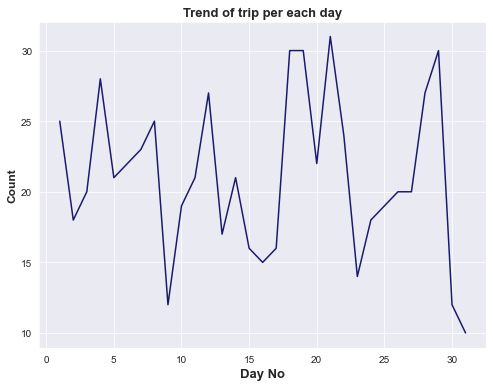

In [48]:
plt.figure(figsize=(8,6))
sns.set_style('darkgrid')
sns.lineplot(x=df_day_no['Day_no'],y=df_day_no['Count'],data=df_day_no,color='midnightblue')
plt.title('Trend of trip per each day',fontsize=13,weight='bold')
plt.xlabel('Day No',fontsize=13,weight='bold')
plt.ylabel('Count',fontsize=12,weight='bold')
plt.show()

<h6>as we can see day 21 has highest number of trips and we can see that trends go ups and downs and day 9 has lowest trips</h6>

<h3>What Are The Trips In The Month</h3>

In [49]:
df_month = df['Month'].value_counts().reset_index()

In [50]:
df_month.head()

,index,Month
0,12,134
1,2,82
2,6,73
3,3,71
4,11,60


In [51]:
column = ['Month_Number','Count']
df_month.columns = column

In [52]:
df_month.head()

,Month_Number,Count
0,12,134
1,2,82
2,6,73
3,3,71
4,11,60


In [53]:
df_month.sort_values(by='Month_Number',inplace=True)

In [54]:
df_month.head()

,Month_Number,Count
5,1,59
1,2,82
3,3,71
6,4,50
7,5,46


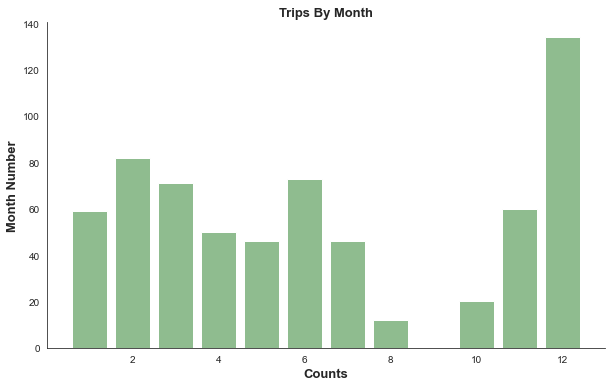

In [65]:
plt.figure(figsize=(10,6))
sns.set_style('white')
plt.bar(x=df_month['Month_Number'],height=df_month['Count'],color='darkseagreen')
plt.title("Trips By Month",fontsize=13,weight='bold')
plt.xlabel('Counts',fontsize=13,weight='bold')
plt.ylabel('Month Number',fontsize=13,weight='bold')
sns.despine()
plt.show()

<h6> We can see that december has highest number of trips and september has 0 trips</h6>

<h3>Top 10 starting points of trips. Where Do People Start Boarding Their Trip From Most</h3>

In [56]:
df_trip = df['Start'].value_counts().reset_index().head(10)

In [57]:
df_trip.head(10)

,index,Start
0,Cary,161
1,Unknown Location,55
2,Morrisville,54
3,Whitebridge,36
4,Durham,30
5,Kar?chi,26
6,Raleigh,21
7,Lahore,19
8,Islamabad,15
9,Apex,11


In [58]:
df_trip['index'].replace('Kar?chi','Karachi',inplace=True)

In [59]:
df_trip.head(10)

,index,Start
0,Cary,161
1,Unknown Location,55
2,Morrisville,54
3,Whitebridge,36
4,Durham,30
5,Karachi,26
6,Raleigh,21
7,Lahore,19
8,Islamabad,15
9,Apex,11


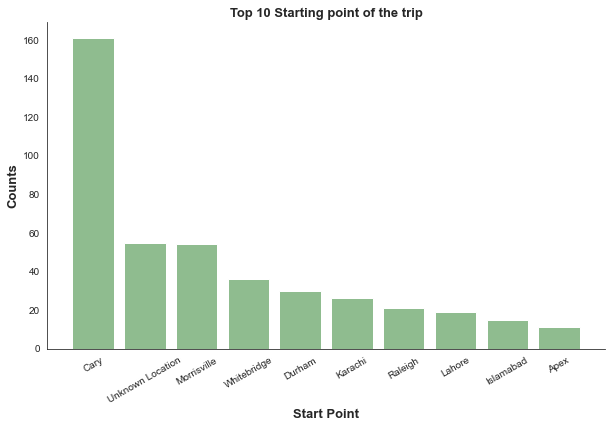

In [63]:
plt.figure(figsize=(10,6))
sns.set_style('white')
plt.bar(x=df_trip['index'],height=df_trip['Start'],color='darkseagreen')
plt.title("Top 10 Starting point of the trip",fontsize=13,weight='bold')
plt.xlabel('Start Point',fontsize=13,weight='bold')
plt.xticks(rotation=30)
plt.ylabel('Counts',fontsize=13,weight='bold')
sns.despine()
plt.show()

<h6>Most numbers of trip starts from Cary </h6>